[SOFTEX] Residência em TIC - MCTI Futuro - IFMA 


# 3. Ciência de Dados em Python 
## 3.5. Análise Exploratória de Dados

Este notebook é parte do material do Curso de Treinamento em IA criado pelo IFMA/DComp e financiado pelo SOFTEX, 2023.

Elaborado por Prof. Josenildo Silva (jcsilva@ifma.edu.br)

# Um Tutorial Simples sobre Análise Exploratória de Dados
#### por Jakki Seshpanpu

**Nota**: Este notebook é uma tradução do material "A Simple Tutorial on Exploratory Data Analysis" by Jakki Seshapanpu( https://www.kaggle.com/spscientist)

- Tradução: Prof. Josenildo Silva (jcsilva@ifma.edu.br)

- Original: https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis/

## Conceitos Básicos

- Como garantir que você está pronto para usar algoritmos de aprendizado de máquina em um projeto?
- Como escolher os algoritmos mais adequados para o seus dados?
- Como definir atributos que podem ser potencialmente usadas para aprendizado de máquina?

**A Análise Exploratória de Dados (EDA)** ajuda a responder todas essas perguntas, garantindo os melhores resultados para o projeto. É uma abordagem para resumir, visualizar e se familiarizar com as características importantes de um dataset.

**A Análise Exploratória de Dados** é valiosa para projetos de ciência de dados, pois ajuda a garantir que os resultados futuros serão válidos, interpretados corretamente e aplicáveis aos contextos de negócios desejados. Esse nível de certeza pode ser alcançado somente depois que os dados brutos são validados e verificados em busca de anomalias, garantindo que os dados tenha sido coletado sem erros. A EDA também ajuda a encontrar padrões que não eram evidentes ou que valiam a pena investigar para stakeholders de negócios e cientistas de dados, mas que podem ser muito informativos sobre um negócio específico.

A EDA ajuda a refinar seleção de atributos (features) que serão usados para aprendizado de máquina. Uma vez que os cientistas de dados se familiarizam com o conjunto de dados, muitas vezes eles têm que voltar à etapa de criação de atributos, uma vez que as características iniciais podem não estar atendendo ao seu propósito inicial. Uma vez concluída a etapa de EDA, os cientistas de dados obtêm um conjunto de atributos definidos para a etapa aprendizado de máquina.

Ao final da EDA, o cietista de dados possui um resumo dos dados através de estatísticas descritivas que permite aos interessados posteriormente consultar e visualizar os dados de várias maneiras. A EDA também ajuda a avaliar a qualidade dos dados. Dependendo do resultado da EDA, você pode decidir corrigir, descartar ou manipular seus dados de maneira diferente.

**Métodos da Análise Exploratória de Dados**

- Análise univariada - fornece estatísticas resumidas para cada atributo dos dados brutos
- Análise bivariada - busca relação entre cada atributo nos dados e a variável alvo
- Análise multivariada - busca por interações entre diferentes atributos nos dados
- Redução da dimensionalidade - ajuda a identificar os atributos mais relevante dos dados e permite o processamento de um volume reduzido de dados.


   
# Estudo de Caso

Esta é a análise exploratória com os dados da House Prices Kaggle Competition. Confira o link abaixo: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Se você perguntar a alguém sobre a casa dos seus sonhos muito provavel que você não ouça falar sobre a altura do pé-direito, ou distância até a rodovia mais próxima. No entanto, neste dataset é possivel descobrir que estes aspectos são muitos mais relevantes do que o número de quartos ou uma cerca branca de madeira. Este dataset apresenta 79 atributos sobre (quase) todos as características das casas em Ames, Iowa, EUA, e te desafia a prever o preço final de cada casa.
Os dados são apresentados em dois conjuntos, um de treino e outro de teste. Há 1460 instancias (tuplas) em cada um deles. Há um total de 81 atributos, dos quais 43 são categóricos. Há ainda um campo de identificação e o valor da venda (SalesPrice).   

## 0. Configurações e leitura dos dados

Dependências

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
#from sklearn import ensemble, tree, linear_model
import missingno as msno

Configuração de plots

In [10]:
plt.rcParams["figure.figsize"] = (6,3)

In [11]:
sns.set(style='ticks')

Carregar os dados

**Nota**: no tutorial original, o autor primeiro faz atividades de limpeza de dados e só depois faz análise exploratória. Neste curso, fizemos a preparação de dados no notebook anterior. Por isso estamos carregando um dataset chamado 'train_limpo'

In [12]:
test = pd.read_csv('../data/raw/test.csv')
train = pd.read_csv('../data/processed/train_limpo.csv')

## 1. Descrição básica  dos dados

O passo inicial é ter uma descrição básica. Use o método `describe()` para ter estatísticas descritivas. Este métodos são robustos, ou seja, não incluem os valores nulos dos dados. 

In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_scal,LotFrontage_scal,LotArea_scal,Neighborhood_code
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,...,1377.000000,1377.0,1377.000000,1377.000000,1377.000000,1377.000000,1.377000e+03,1.377000e+03,1.377000e+03,1377.000000
mean,733.018155,56.877269,69.383362,9574.976761,6.092229,5.559187,1972.109659,1984.981845,102.714449,429.524328,...,14.201162,0.0,12.014524,6.315178,2007.818446,178941.347131,5.676086e-17,-3.160548e-17,-1.935029e-17,12.277415
std,420.259939,42.199022,20.633710,3823.531963,1.376000,1.095520,29.920345,20.648226,176.807873,427.679130,...,52.149852,0.0,78.296951,2.694904,1.329619,76291.197288,1.000000e+00,1.000000e+00,1.000000e+00,6.015727
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,2006.000000,34900.000000,-8.738892e-01,-2.344870e+00,-2.164223e+00,0.000000
25%,372.000000,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,5.000000,2007.000000,129500.000000,-8.738892e-01,-4.547589e-01,-5.426859e-01,7.000000
50%,735.000000,50.000000,70.049958,9375.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,375.000000,...,0.000000,0.0,0.000000,6.000000,2008.000000,161000.000000,-1.629722e-01,3.230616e-02,-5.230158e-02,12.000000
75%,1094.000000,70.000000,78.000000,11362.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,700.000000,...,0.000000,0.0,0.000000,8.000000,2009.000000,212000.000000,3.109724e-01,4.176000e-01,4.673750e-01,17.000000
max,1460.000000,190.000000,313.000000,29959.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,396.000000,0.0,800.000000,12.000000,2010.000000,755000.000000,3.154640e+00,1.180673e+01,5.331203e+00,24.000000


Veja também os dados categóricos

In [14]:
train.describe(exclude='number')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377,...,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377
unique,5,2,4,4,2,5,3,25,9,7,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1084,1373,885,1256,1376,1001,1316,213,1196,1366,...,690,1290,1017,897,649,1315,1327,1268,1191,1129


Use head(), tail() e sample() para ter uma ideia inicial sobre os dados

In [15]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_scal,LotFrontage_scal,LotArea_scal,Neighborhood_code
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500,0.074000,-0.212437,-0.294224,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500,-0.873889,0.514529,0.006545,24
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500,0.074000,-0.067044,0.438083,5
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000,0.310972,-0.454759,-0.006532,6
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000,0.074000,0.708386,1.225313,15


In [16]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_scal,LotFrontage_scal,LotArea_scal,Neighborhood_code
1372,1455,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,10,2009,WD,Normal,185000,-0.873889,-0.357830,-0.542686,21
1373,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,8,2007,WD,Normal,175000,0.074000,-0.357830,-0.433624,8
1374,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2010,WD,Normal,210000,-0.873889,0.756851,0.941544,14
1375,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,4,2010,WD,Normal,142125,-0.873889,-0.067044,0.037145,12
1376,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,6,2008,WD,Normal,147500,-0.873889,0.272207,0.094683,7


In [17]:
train.sample(n=10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_scal,LotFrontage_scal,LotArea_scal,Neighborhood_code
406,438,45,RM,50.000000,6000,Pave,Reg,Lvl,AllPub,Inside,...,0,1,2009,WD,Normal,119000,-0.281458,-0.939403,-0.934993,3
778,830,160,FV,24.000000,2544,Pave,Reg,Lvl,AllPub,Inside,...,0,7,2006,WD,Normal,147400,2.443723,-2.199477,-1.838870,21
283,308,50,RM,70.049958,7920,Pave,IR1,Lvl,AllPub,Inside,...,0,3,2008,WD,Normal,89500,-0.162972,0.032306,-0.432840,9
112,118,20,RL,74.000000,8536,Pave,Reg,Lvl,AllPub,Corner,...,0,4,2007,New,Partial,155000,-0.873889,0.223742,-0.271732,7
1295,1373,60,RL,75.000000,9750,Pave,Reg,Lvl,AllPub,Corner,...,0,6,2006,WD,Normal,274300,0.074000,0.272207,0.045775,5
463,497,20,RL,70.049958,12692,Pave,IR1,Lvl,AllPub,Inside,...,0,5,2007,WD,Normal,430000,-0.873889,0.032306,0.815221,15
227,246,20,RL,80.000000,10400,Pave,Reg,Lvl,AllPub,Inside,...,0,6,2006,WD,Normal,241500,-0.873889,0.514529,0.215775,14
278,303,20,RL,118.000000,13704,Pave,IR1,Lvl,AllPub,Corner,...,0,1,2006,WD,Normal,205000,-0.873889,2.356175,1.079898,5
870,927,60,RL,93.000000,11999,Pave,Reg,Lvl,AllPub,Inside,...,0,5,2007,WD,Normal,285000,0.074000,1.144566,0.633975,16
430,464,70,RL,74.000000,11988,Pave,IR1,HLS,AllPub,Inside,...,0,8,2008,WD,Normal,188700,0.310972,0.223742,0.631098,6


Vale a penas verificar se a quantidade de tuplas e atributos está de acordo com a descrição dada.

In [18]:
train.shape , test.shape

((1377, 81), (1459, 80))

Vamos examinar as colunas numéricas no dataset

In [19]:
train_num_df = train.select_dtypes(include=['number'])
train_num_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSSubClass_scal',
       'LotFrontage_scal', 'LotArea_scal', 'Neighborhood_code'],
      dtype='object')

Agora, vamos ver as colunas categóricas

In [20]:
train_cat_df = train.select_dtypes(include=['object'])
train_cat_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

## 2. Análise Univariada

### 2.1 Descrição dos atributos numéricas

In [22]:
train.skew(numeric_only=True).sort_values(ascending=False)[:5] 

3SsnPorch       37.107951
LowQualFinSF    19.090905
MiscVal          6.732612
KitchenAbvGr     4.503066
BsmtFinSF2       4.305999
dtype: float64

In [14]:
train.skew(numeric_only=True).sort_values(ascending=False)[:-6:-1] 

GarageYrBlt    -0.672165
YearBuilt      -0.635403
YearRemodAdd   -0.507104
GarageCars     -0.329559
Id             -0.011514
dtype: float64

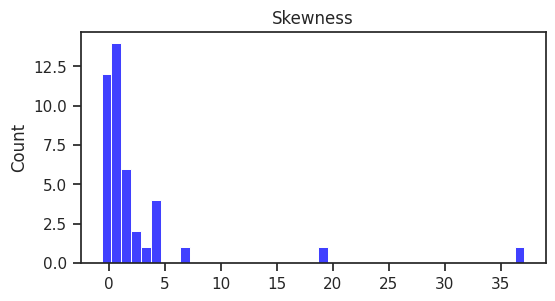

In [24]:
sns.histplot(train.skew(numeric_only=True),color='blue')
plt.title("Skewness")
plt.show()

In [26]:
train.kurt(numeric_only=True).sort_values(ascending=False)[:10]

3SsnPorch           1377.000000
LowQualFinSF         368.115220
MiscVal               45.991350
KitchenAbvGr          21.837511
BsmtFinSF2            20.693265
BsmtHalfBath          17.334108
LotFrontage           16.081279
LotFrontage_scal      16.081279
ScreenPorch           15.559526
MasVnrArea             9.769103
dtype: float64

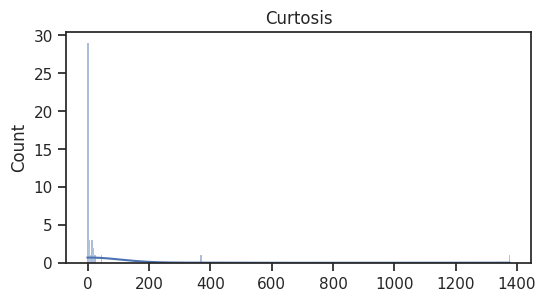

In [27]:
sns.histplot(train.kurt(numeric_only=True), kde = True)
plt.title("Curtosis")
plt.show()

**Comentário**: Há muitos atributos com distribução não normal, com caudas à esquerda e à direita. Também há algumas variáveis com curtosis muito alta (acima de 100), o que pode indicar forte presença de outliers. 

**Recomendação**: considerar tratamento de outliers para os atributos com maiores curtosis

Text(500000, 135.0, 'kurt = 5.28')

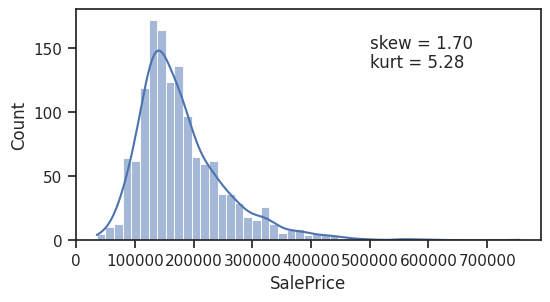

In [28]:
skw = train['SalePrice'].skew() 
krt = train['SalePrice'].kurt()
sns.histplot(train['SalePrice'], kde=True);
plt.text(500000,150.0,f"skew = {skw:0.2f}")
plt.text(500000,135.0,f"kurt = {krt:0.2f}")

É aparente que SalePrice não segue uma distribuição normal, com uma cauda à direita e com achatamento menor que normal. 


<Axes: >

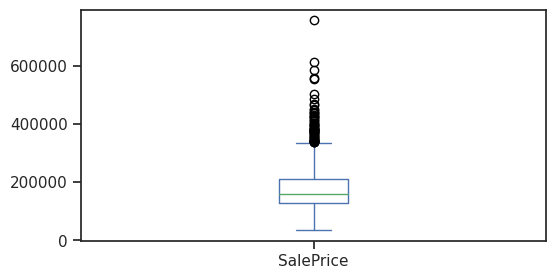

In [29]:
train['SalePrice'].plot.box()

A análise do boxplot mostra que realmente há muitos outliers acima de 400 mil dolares. 

Para se obter uma distribuição normal, pode-se tentar transformar os dados com log.  

In [30]:
logSalePrice = np.log(train['SalePrice'])
logSalePrice.skew()

0.07543544660626805

<Axes: xlabel='SalePrice', ylabel='Count'>

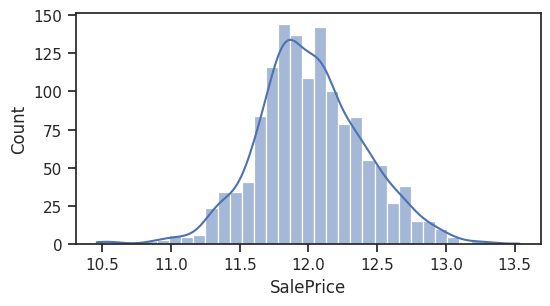

In [31]:
sns.histplot(logSalePrice,kde=True)

Vamos gerar vários boxplot para se ter uma ideia das distribuicões dos atributos numéricos

In [32]:
nf_cols = train_num_df.columns

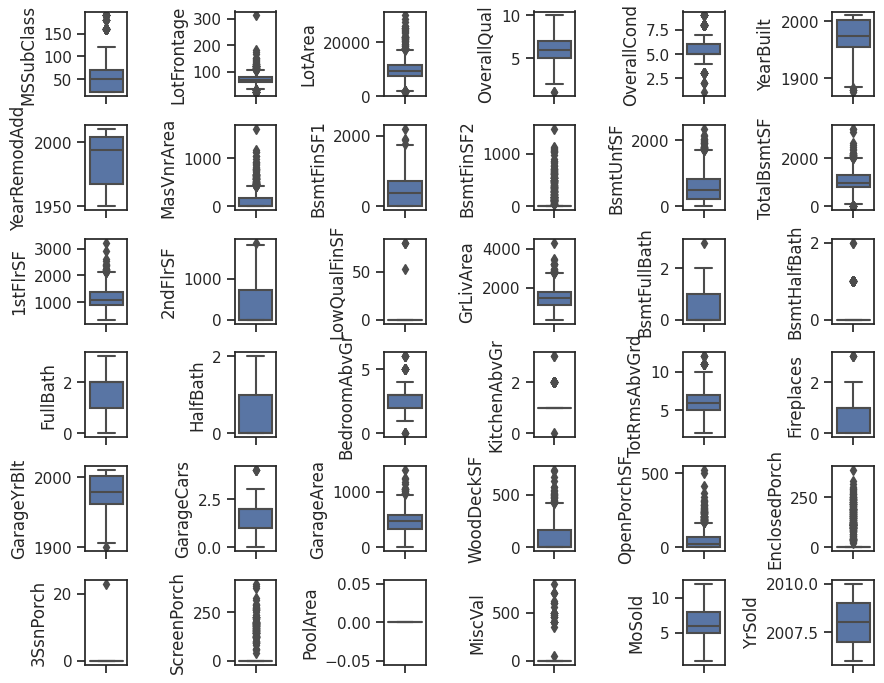

In [35]:
fig,axes=plt.subplots(nrows=6,
                      ncols=6,
                      figsize=(9,7))
axes = axes.flatten() # ou .ravel()
for i,col in enumerate(nf_cols[1:-1]):
    if (i<len(axes)):
        sns.boxplot(data=train,y=col,ax=axes[i])
plt.tight_layout()

Vamos observar as ditribuições das variáveis com maior assimetria (skewness)

### 2.2 Descrição dos atributos categóricas

In [36]:
train.describe(exclude='number')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377,...,1377,1377,1377,1377,1377,1377,1377,1377,1377,1377
unique,5,2,4,4,2,5,3,25,9,7,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1084,1373,885,1256,1376,1001,1316,213,1196,1366,...,690,1290,1017,897,649,1315,1327,1268,1191,1129


In [37]:
train_cat_df.shape

(1377, 39)

In [38]:
cat_cols=train_cat_df.columns

In [39]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print(f"'{column_name}' has '{unique_category}' unique categories")

'MSZoning' has '5' unique categories
'Street' has '2' unique categories
'LotShape' has '4' unique categories
'LandContour' has '4' unique categories
'Utilities' has '2' unique categories
'LotConfig' has '5' unique categories
'LandSlope' has '3' unique categories
'Neighborhood' has '25' unique categories
'Condition1' has '9' unique categories
'Condition2' has '7' unique categories
'BldgType' has '5' unique categories
'HouseStyle' has '8' unique categories
'RoofStyle' has '6' unique categories
'RoofMatl' has '5' unique categories
'Exterior1st' has '15' unique categories
'Exterior2nd' has '16' unique categories
'MasVnrType' has '3' unique categories
'ExterQual' has '4' unique categories
'ExterCond' has '5' unique categories
'Foundation' has '6' unique categories
'BsmtQual' has '4' unique categories
'BsmtCond' has '4' unique categories
'BsmtExposure' has '4' unique categories
'BsmtFinType1' has '6' unique categories
'BsmtFinType2' has '6' unique categories
'Heating' has '6' unique categori

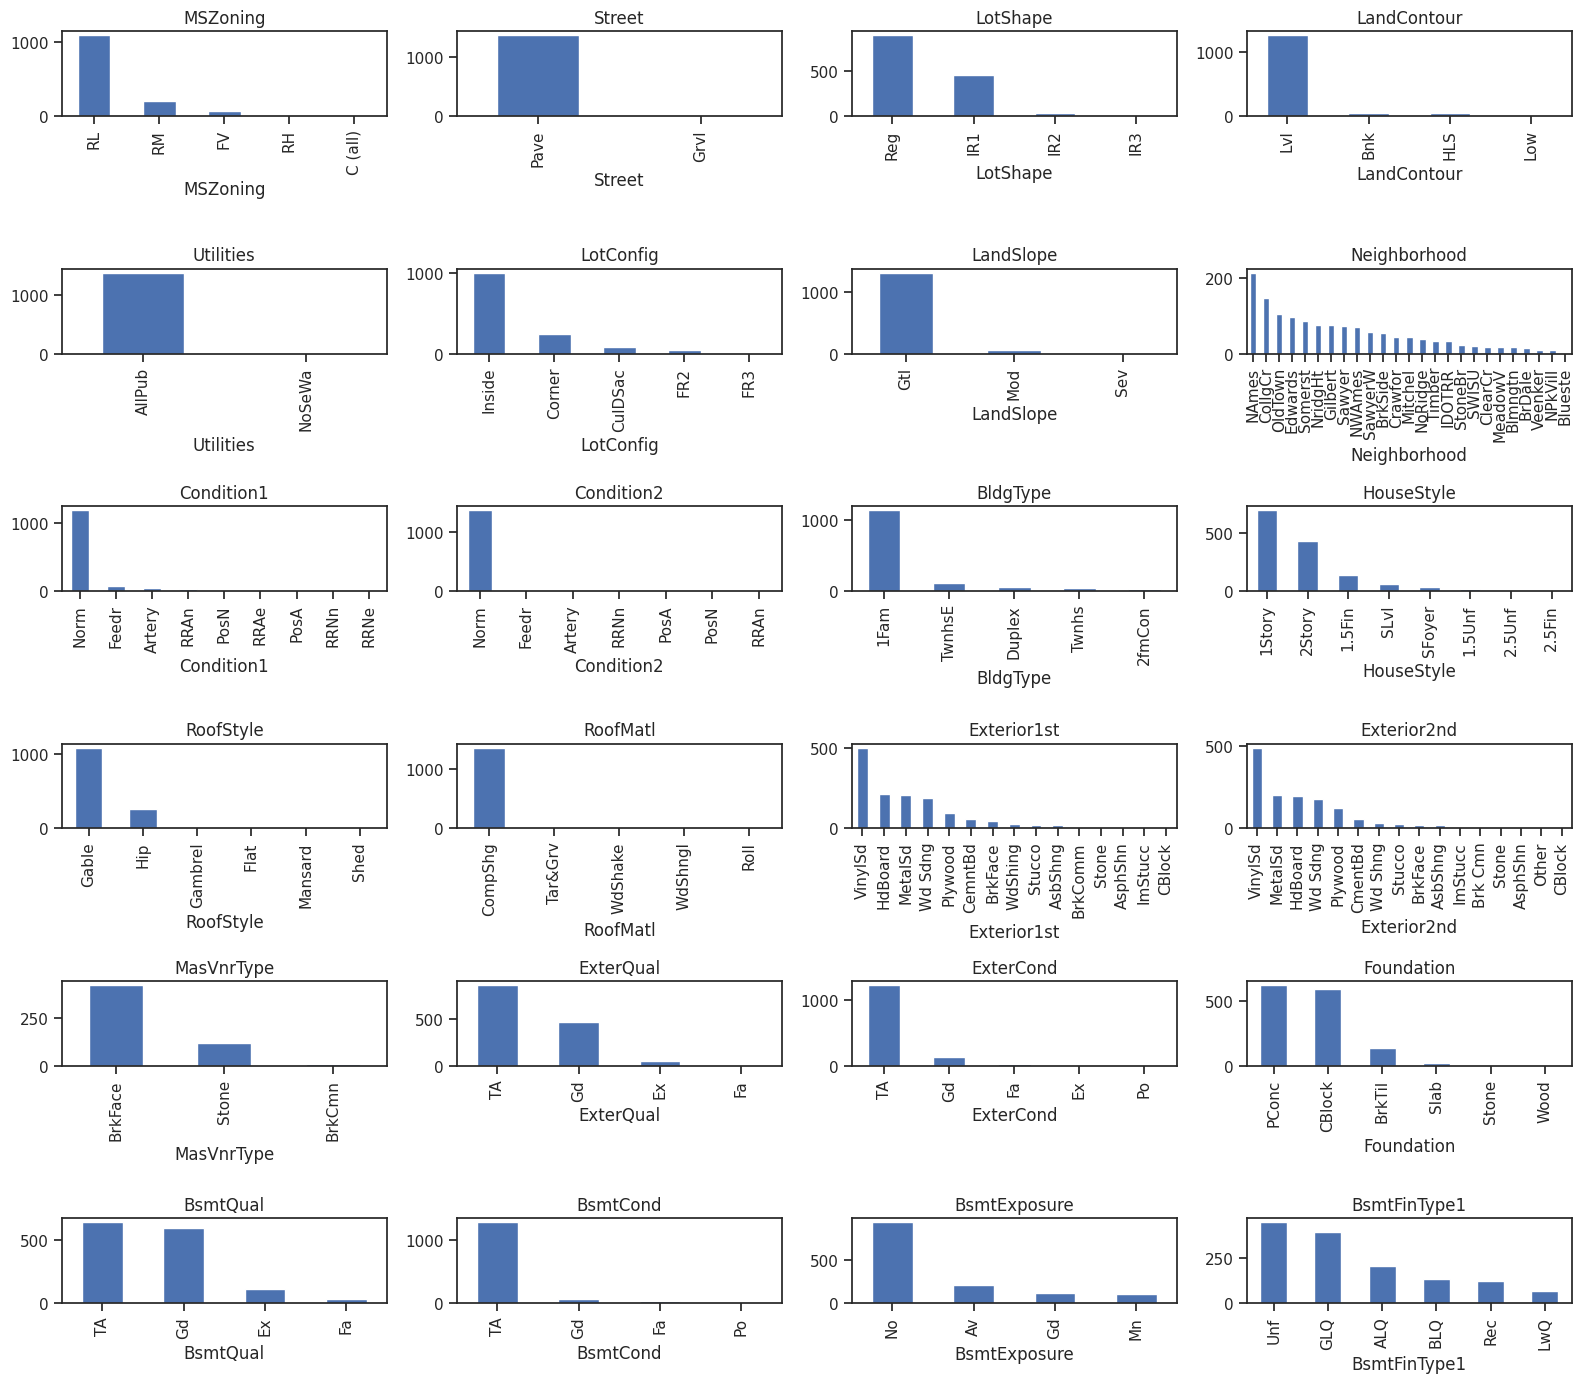

In [41]:
rows, cols = 6,4
fig,axes = plt.subplots(nrows=rows,
                        ncols=cols,
                        figsize=(16,14))
axes=axes.flatten()
for i,c in enumerate(cat_cols[:cols*rows]):
    train_cat_df.iloc[:,i].value_counts().\
                    plot.bar(title=c,ax=axes[i])
plt.tight_layout()

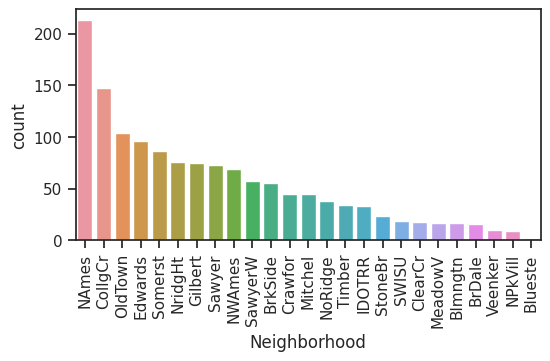

In [42]:
lista = train['Neighborhood'].value_counts().index
sns.countplot(data=train,x ='Neighborhood', order= lista)
xt = plt.xticks(rotation=90)

**Comentários**

1. Os bairros com maior número de negócios são NAmes, CollgCr, e OldTown
2. A maioria dos imóveis são do tipo 1Story ou 2Story
3. A maioria das oferta de imóveis são em zonas de baixa e média densidade (RL e RM)

## 3. Análise Bivariada

Encontrar padrões a partir do nível de correlação entre os atributos. Por exemplo, vamos fazer a correlação de todos os atriutos em relação a SalePrice

In [43]:
correlation = train_num_df.drop(['PoolArea'],axis='columns').corr()
print(correlation['SalePrice'].sort_values(ascending = False)[:10])

SalePrice       1.000000
OverallQual     0.807586
GrLivArea       0.737623
GarageCars      0.654555
TotalBsmtSF     0.649373
GarageArea      0.647588
1stFlrSF        0.626162
FullBath        0.569015
YearBuilt       0.555161
TotRmsAbvGrd    0.553004
Name: SalePrice, dtype: float64


Para continuar a análise iremos utilizar os seguintes tipos de visualizações:

 - Heat Map das correlações
 - Heat Map com as correlações mais importantes
 - Pair Plot 
 - Scatter Plot

### Heat Map das Correlações

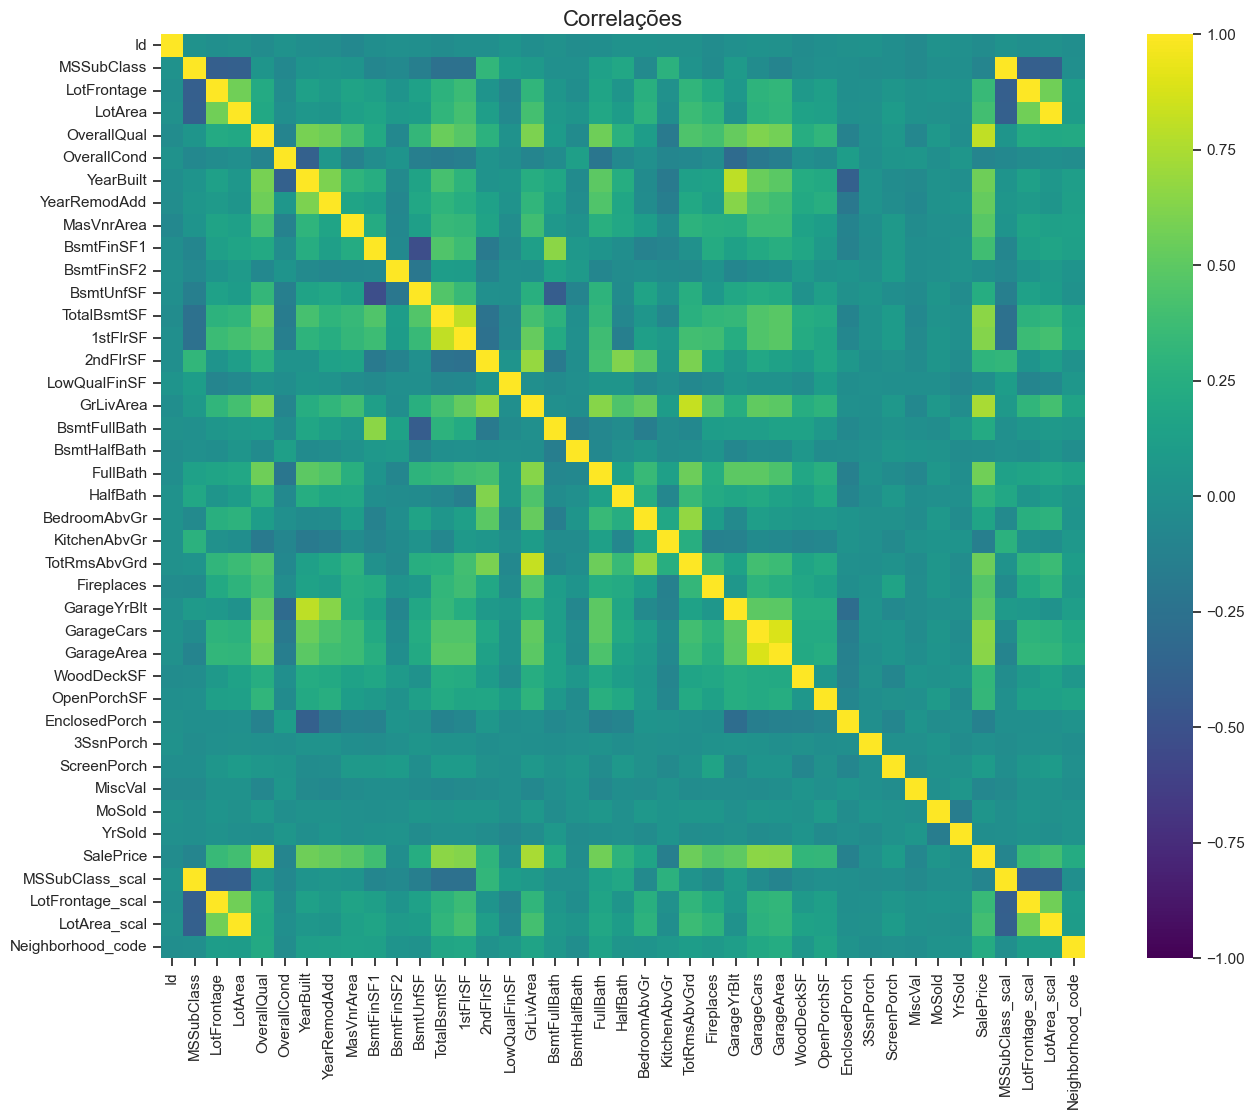

In [53]:
f , ax = plt.subplots(figsize = (16,12))
plt.title('Correlações',y=1,size=16)
sns.heatmap(correlation,
            square = True,
            vmin=-1.0,  
            vmax=1.0, 
            cmap='viridis')
plt.show()

**Comentários**

Em uma inspeção rápida chama a atenção as seguintes correlações:
1. As colunas 'TotalBsmtSF' e '1stFlrSF'.
2. As colunas 'Garage_*'.

Estas correlações são tão fortes que podem indicar um caso de **multicolinearidade**. Se for confirmado, uma de cada par deve ser removida antes de realizar treinamento de alguns algoritmos. Total Basement SQ Foot e First Floor SQ Foot realmente são quase a mesma informação. Faz sentido pensar que basta uma das duas permanecer no dataset.  

Outro ponto importante é que 'SalePrice' tem correlação forte com 'GrLivArea', 'TotalBsmtSF', e 'OverallQual'. Vamos explorar essas e outras colunas em relação a SalePrice em um heatmap em separado.

### Zoomed HeatMap

#### SalePrice Correlation matrix

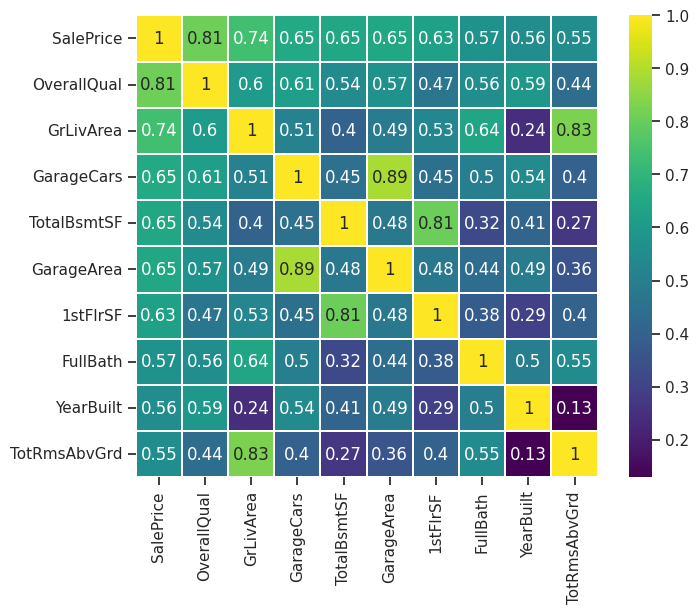

In [44]:
k= 10
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
corr = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr,  
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='viridis',
            linecolor="white",
            xticklabels = cols.values ,
            annot_kws = {'size':12},
            yticklabels = cols.values,
           )
plt.show()

**Comentários**
- 'OverallQual', 'GrLivArea' e 'TotalBsmtSF' são fortemente correlacionados com 'SalePrice'.
- 'GarageCars' and 'GarageArea' são fortemente correlacionadas entre si. Isto decorreto do fato do número de carros que cabe em uma garagem ser proporcional à área da garagem. Portanto, precisamos apenas uma delas. Recomenda-se manter 'GarageCars' já que a correlação com 'SalePrice' é maior.
- 'TotalBsmtSF' e '1stFloor' são fortemente correlacionadas. Recomenda-se manter 'TotalBsmtSF'
- 'TotRmsAbvGrd' e 'GrLivArea' são fortemente correlacionadas
- 'YearBuilt' parece ser fracamente correlacionado com 'SalePrice'. Mas até este ponto da análise, não se pode concluir nada a respeito da relação entre estas duas colunas.

### Pair Plot 

O `sns.pairplot()` permite a visualização de distribuição e scatterplot entre pares dos atributos 'SalePrice', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'FullBath', 'YearBuilt', 'YearRemodAdd'.

/home/jpac/anaconda3/envs/softex-data-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


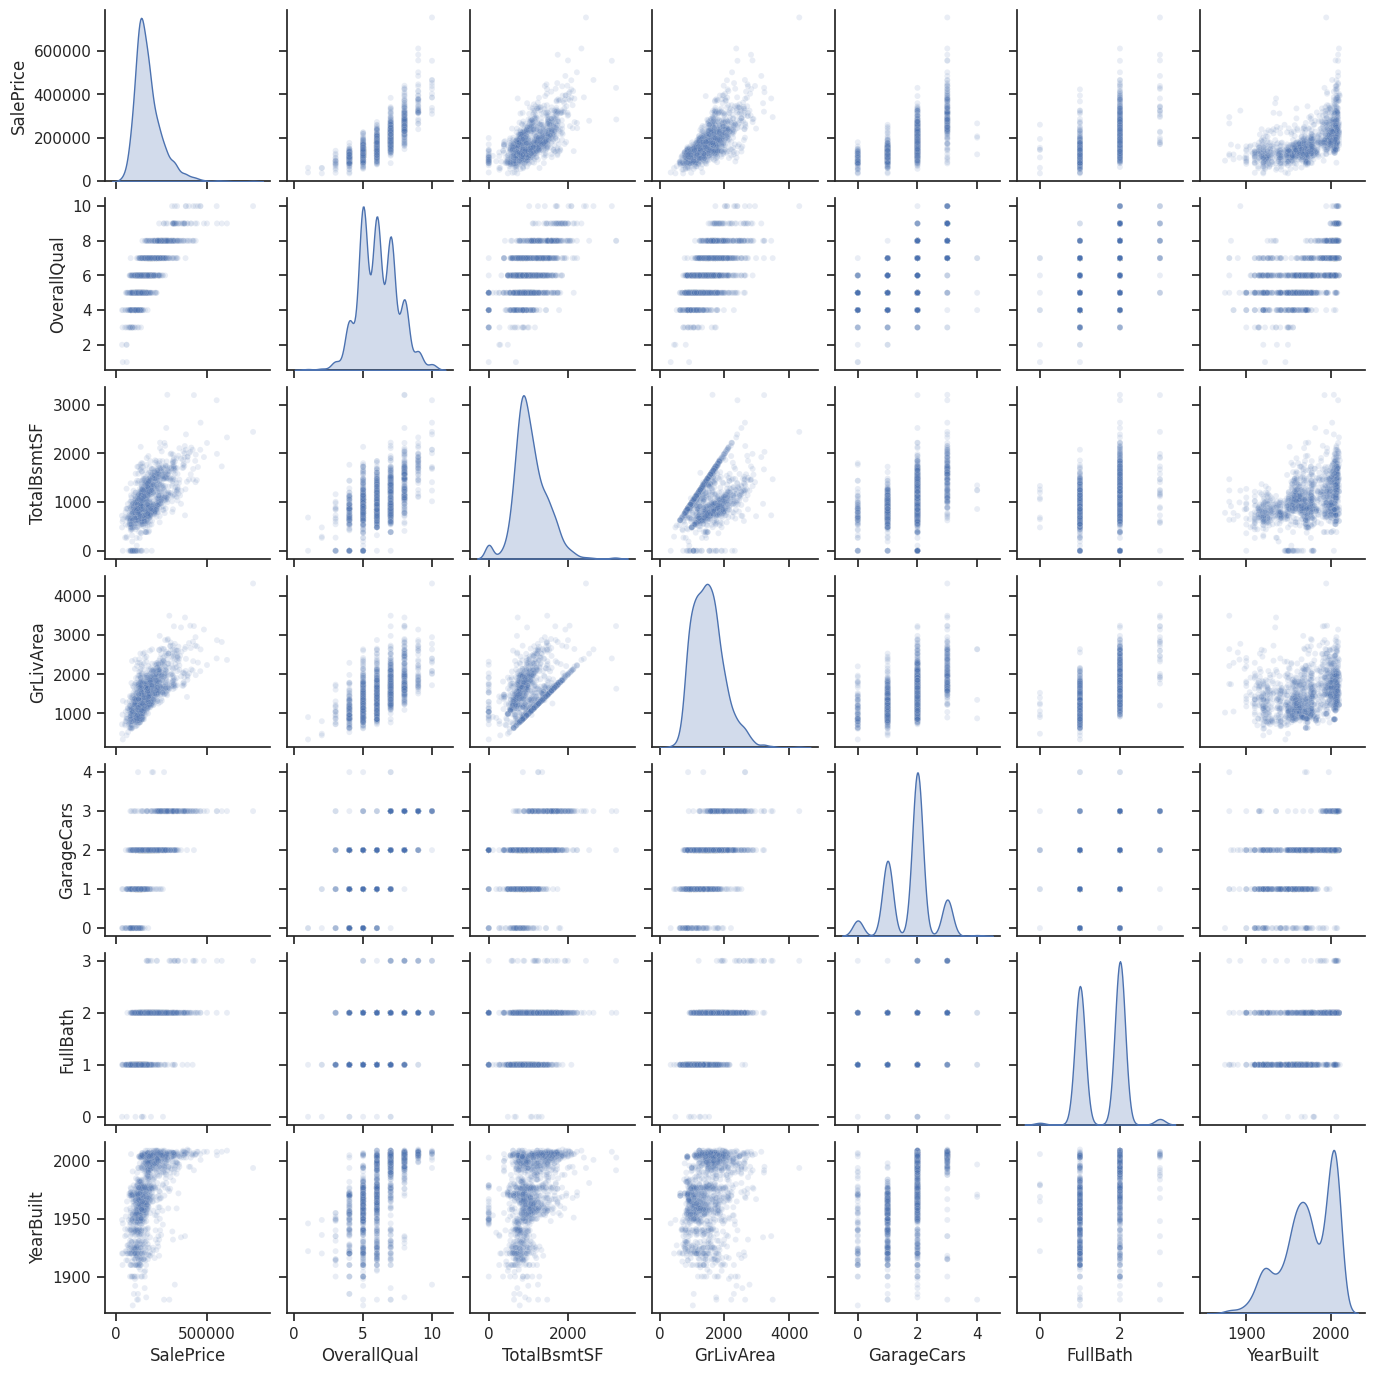

In [45]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt']
sns.pairplot(train[columns],height = 2 ,kind ='scatter',diag_kind='kde',plot_kws=dict(alpha=0.12,size=1))
plt.show()

**Comentários**

- 'TotalBsmtSF' e'GrLiveArea' mostram uma formação de pontos em linha reta, quase como uma borda. Isto acontece porque a área do basement (porão) só pode ser igual ou menor à área útil do térreo. Não é comum um porão ser maior que a área do térreo.

- 'SalePrice' e 'YearBuilt'. Na parte de baixo da nuvem de pontos, pode-se ver uma relação não liner, talvez exponencial. 

- A ultima observação é que os preços estão aumentando mais rapidamente em relação aos anos anteriores.

### Scatter Plot 

#### Scatter plots between the most correlated variables

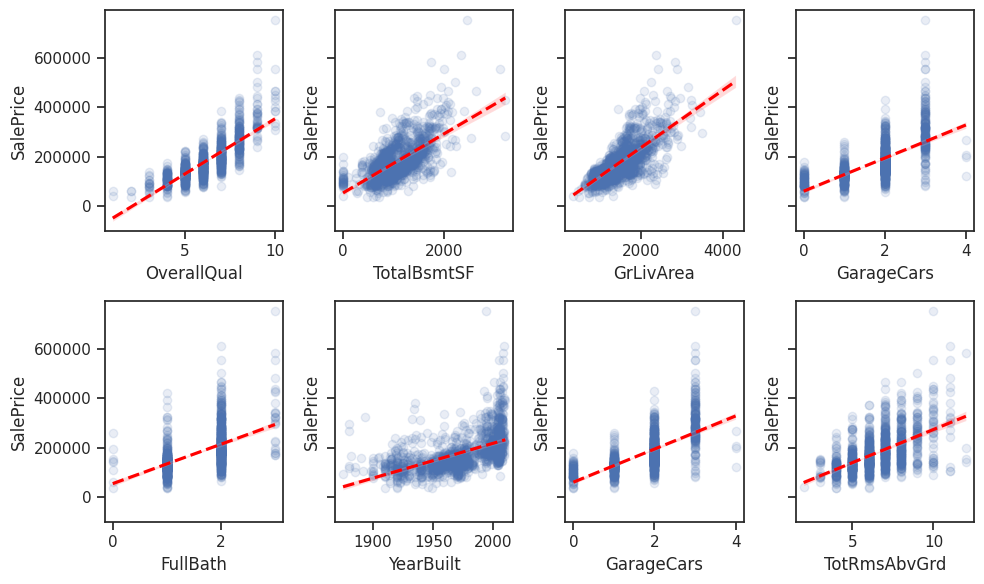

In [46]:
 
cols = ['OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','GarageCars', 'TotRmsAbvGrd']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,6),sharey=True)
axes= axes.flatten()
for i,col in enumerate(cols):
    sns.regplot(y='SalePrice',x=col,data = train[['SalePrice',col]],fit_reg=True, ax=axes[i],scatter_kws=dict(alpha=0.12),line_kws=dict(color='red',linestyle='--'))
    
plt.tight_layout()

Text(0, 0.5, 'Mean Sale Price')

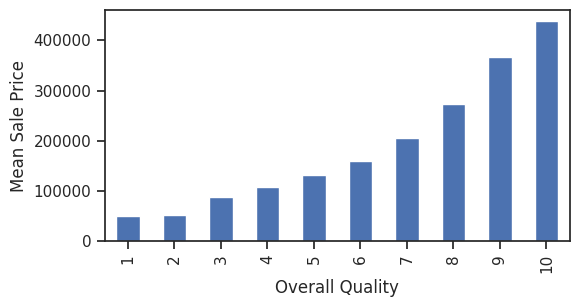

In [47]:
train.groupby(by='OverallQual')['SalePrice'].mean().plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')

#### SalePrice em relação à colunas do tipo não numéricas

Podemos utilizar boxplots para analisar a relação entre SalePrice e variáveis qualitativas.  

In [48]:
def box_feature(df,x,y,**kwargs):
    data = df[[x,y]]
    gb = df.groupby(by=x).median(numeric_only=True)
    lista = gb.sort_values(by=y,ascending=True).index.to_list()
    fig = sns.boxplot(data=df,x=x, y=y,order=lista,**kwargs)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);    

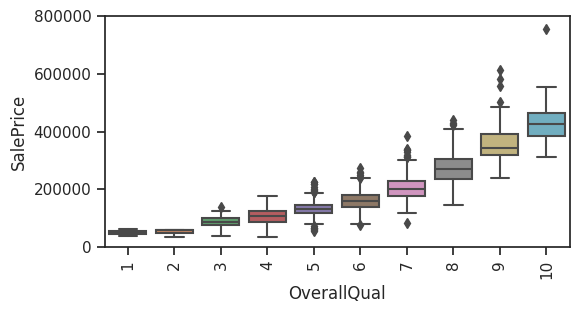

In [49]:
box_feature(df=train,y='SalePrice',x='OverallQual')

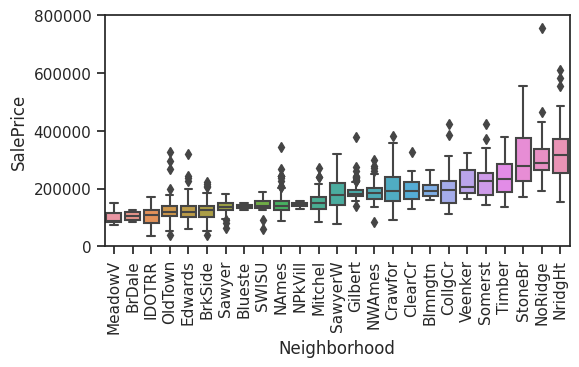

In [50]:
box_feature(df=train,y="SalePrice",x="Neighborhood")

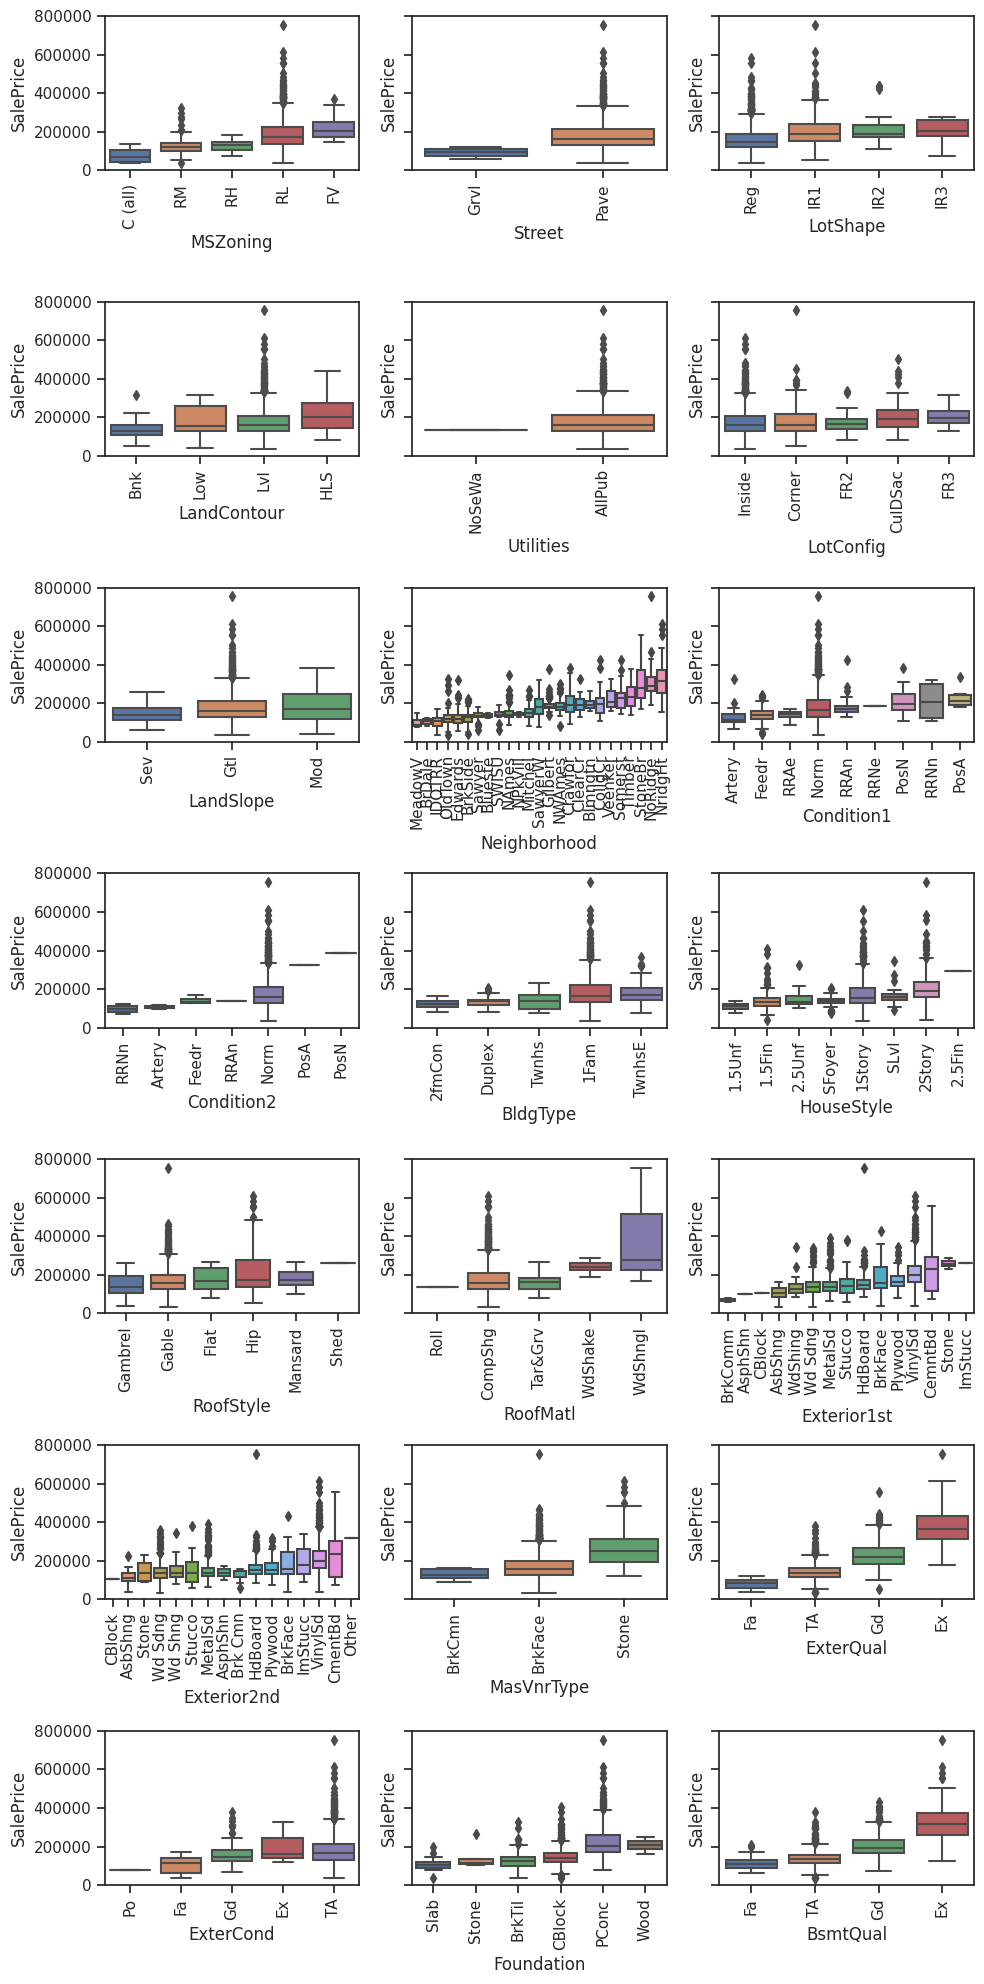

In [51]:
rows=7
cols=3
fig,axes = plt.subplots(nrows=rows,ncols=cols,figsize=(10,20),sharey=True)
axes = axes.flatten()
for i,c in enumerate(cat_cols[:rows*cols]):
    box_feature(df=train,y='SalePrice',x=c,ax=axes[i])
    axes[i].tick_params(axis='x',rotation=90)
plt.tight_layout()

#### Housing Price vs Sales

- Sale Type & Condition
- Sales Seasonality

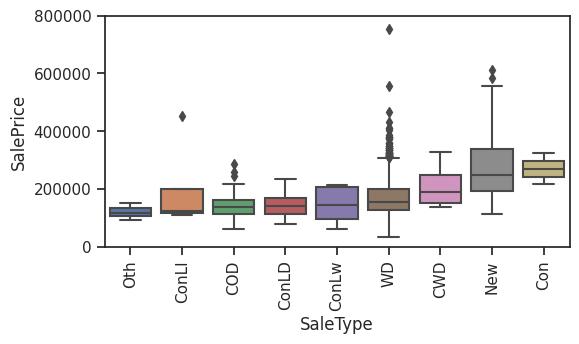

In [52]:
box_feature(df=train,y="SalePrice",x="SaleType")

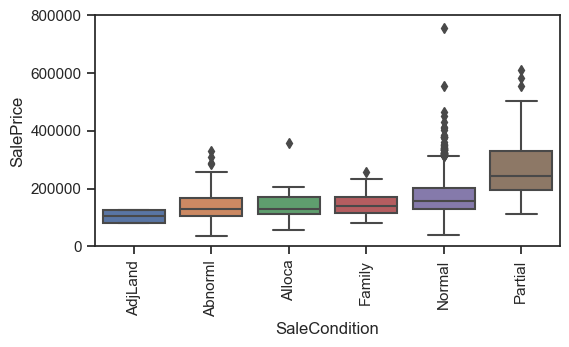

In [63]:
box_feature(df=train,y="SalePrice",x="SaleCondition")

#### ViolinPlot - Functional vs.SalePrice

<Axes: xlabel='Functional', ylabel='SalePrice'>

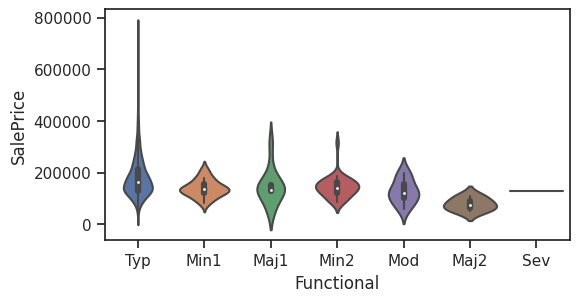

In [53]:
sns.violinplot(data = train,x='Functional', y='SalePrice')

#### Facet Grid Plot - FirePlace QC vs.SalePrice

/home/jpac/anaconda3/envs/softex-data-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


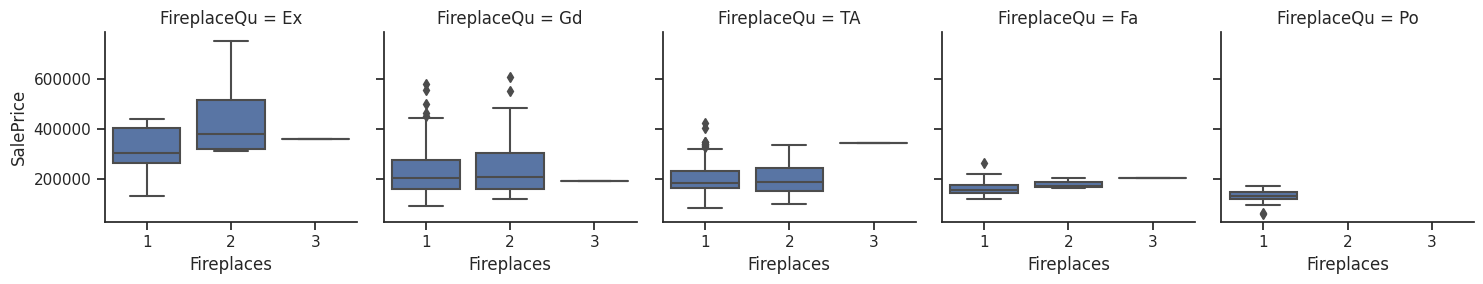

In [54]:
g = sns.FacetGrid(train, col = 'FireplaceQu', col_wrap = 5, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3])

**Comentário**

A qualidade da lareira parece ser mais importante para determinar o SalePrice que o número delas em uma casa. 


# 4. Sumário da análise exploratória

## Análise Univariada
 1. Variáveis não normais que mais chamaram a atenção
 1. Variáveis categóricas com poucas categorias
 1. Variáveis categóricas com muitas categorias
 1. Recomendações 

## Análise Bivariada

 1. Suspeita de multicolinearidade
 1. Sugestão de remoção de variáveis altamente correlaciondas
 1. Principais indícios de padrões (insights) encontrado
 
## Outros pontos relevantes
 1. Tipos de aprendizagem de máquina sugeridos
 2. Testes de hipótese



# 5. Conclusão

Este exemplo, embora extenso, mostra apenas uma forma simplificada de análise. Na prática essa etapa é iterativa e não é realizada em uma única vez. Pode ser realizado de modo iterativo retornando após aplicar os tratamentos para cada problema identificado. 

Nesta etapa também pode se decidir criar scripts que automatizam os tratamentos realizados manualmente aqui. Também é possível gerar versões limpas e transormadas dos datasets para serem utilizados nas próximas etapas.

Utilize esse notebook para estudar e ter uma visão geral das etapas de analise exploratória, bem como o tipo de resultados que se pode encontar. 